<a href="https://colab.research.google.com/github/comaria23/CNN-Brain-TumorDetection/blob/main/Final_Project_CNN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
labels = ['glioma','notumor','meningioma','pituitary']

In [ ]:
X_train = []
y_train = []
X_test=[]
y_test=[]
image_size = 224
for i in labels:
    folderPath = os.path.join('/content/gdrive/My Drive/Date_disertatie','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/gdrive/My Drive/Date_disertatie','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)

X_train = np.array(X_train)
X_test= np.array(X_test)

100%|██████████| 300/300 [00:05<00:00, 52.52it/s] 


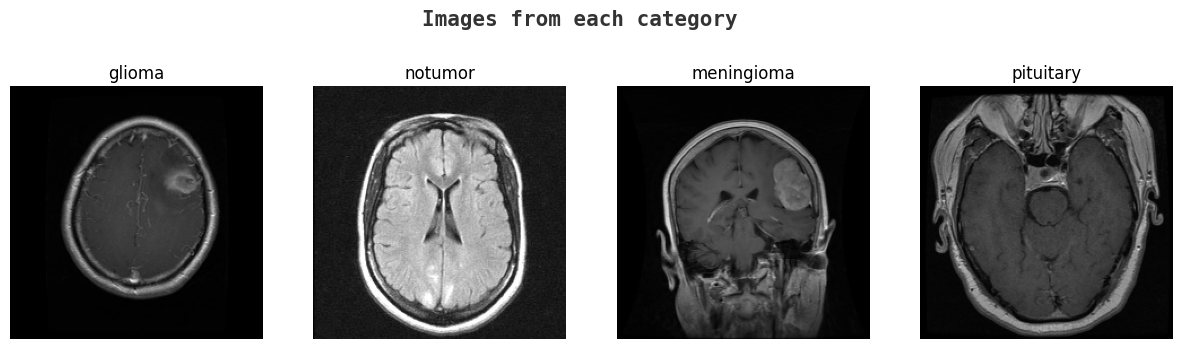

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(15,15))
fig.text(s='Images from each category',size=15,fontweight='bold',
             fontname='monospace' ,y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
X_train, y_train = shuffle(X_train, y_train, random_state=28)

In [ ]:
X_train.shape

(5712, 224, 224, 3)

<Axes: xlabel='count'>

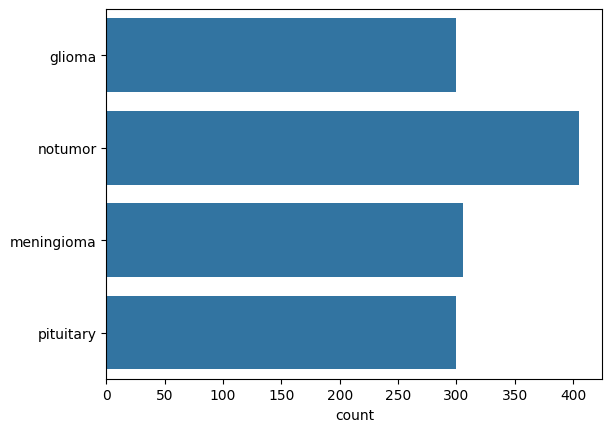

In [ ]:
sns.countplot(y_test)

<Axes: xlabel='count'>

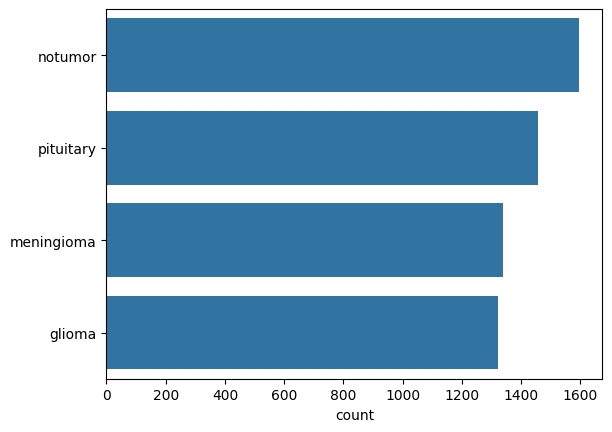

In [ ]:
sns.countplot(y_train)

In [ ]:
y_train_ = []
for i in y_train:
    y_train_.append(labels.index(i))
Y_train = y_train_

Y_train = tf.keras.utils.to_categorical(Y_train)

y_test_ = []
for i in y_test:
    y_test_.append(labels.index(i))
Y_test = y_test_

Y_test = tf.keras.utils.to_categorical(Y_test)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=28)

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model = base_model.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=base_model.input, outputs = model)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, min_denta=0.0001, mode='auto', verbose=1)
tensorboard = TensorBoard(log_dir='logs')
checkpoint = ModelCheckpoint("brain_tumor_classification.h5", monitor='val_accuracy', save_best_only=True, mode='auto', verbose=1)

In [ ]:
datagen = ImageDataGenerator(
featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=90,
zoom_range=0.2,
width_shift_range=0.2,
horizontal_flip=False,
vertical_flip=False)

datagen.fit(X_train)

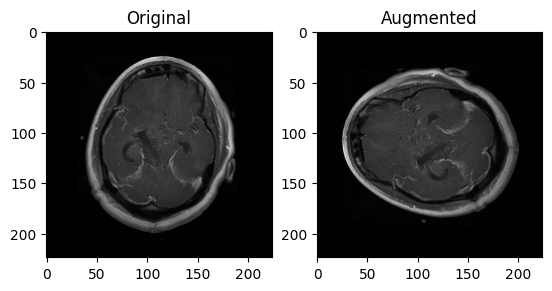

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented')
  plt.imshow(augmented)
rotated=tf.image.rot90(X_train[1])
visualize(X_train[1], rotated)

In [ ]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=32),
                              validation_data=(X_val, Y_val),
                              epochs=50,
                              verbose=1,
                            callbacks=[tensorboard, checkpoint, reduce_lr])

Epoch 1/50
143/143 [==============================] - ETA: 0s - loss: 0.3244 - accuracy: 0.8783
Epoch 1: val_accuracy improved from -inf to 0.88801, saving model to brain_tumor_classification.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


143/143 [==============================] - 115s 507ms/step - loss: 0.3244 - accuracy: 0.8783 - val_loss: 0.4286 - val_accuracy: 0.8880 - lr: 0.0010
Epoch 2/50
143/143 [==============================] - ETA: 0s - loss: 0.1781 - accuracy: 0.9394
Epoch 2: val_accuracy improved from 0.88801 to 0.94138, saving model to brain_tumor_classification.h5
143/143 [==============================] - 69s 481ms/step - loss: 0.1781 - accuracy: 0.9394 - val_loss: 0.1964 - val_accuracy: 0.9414 - lr: 0.0010
Epoch 3/50
143/143 [==============================] - ETA: 0s - loss: 0.1253 - accuracy: 0.9549
Epoch 3: val_accuracy did not improve from 0.94138
143/143 [==============================] - 68s 473ms/step - loss: 0.1253 - accuracy: 0.9549 - val_loss: 0.1994 - val_accuracy: 0.9396 - lr: 0.0010
Epoch 4/50
143/143 [==============================] - ETA: 0s - loss: 0.1120 - accuracy: 0.9610
Epoch 4: val_accuracy improved from 0.94138 to 0.96500, saving model to brain_tumor_classification.h5
143/143 [======

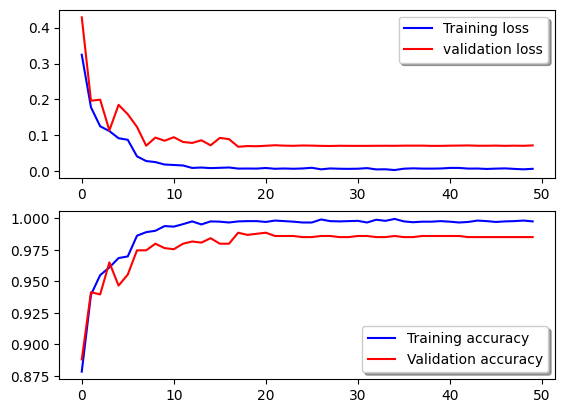

In [ ]:
#Grafic wich shows the accuracy and loss evolution
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(Y_test,axis=1)

41/41 [==============================] - 5s 87ms/step


In [ ]:
accuracy = np.sum(pred==y_test_new)/len(pred)
print("The acuracy for testing data set: {:.2f}%".format(accuracy*100))

The acuracy for testing data set: 99.01%


In [ ]:
train_pred = model.predict(X_train)
train_pred = np.argmax(train_pred, axis=1)
Y_train_new = np.argmax(Y_train, axis=1)
print("The accuracy for training data set: {:.2f}%".format(np.sum(train_pred==Y_train_new)/len(train_pred)*100))

143/143 [==============================] - 9s 60ms/step
The accuracy for training data set: 99.87%


In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       300
           1       1.00      1.00      1.00       405
           2       0.99      0.97      0.98       306
           3       0.98      1.00      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



In [ ]:
#Model saving for later usage without training it again

In [ ]:
model.save('/content/gdrive/My Drive/Colab Notebooks/brain_tumor_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = tf.keras.models.load_model('./brain_tumor_classification.h5')

In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(224,224))
    img = img.reshape(1,224,224,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='GLIOMA'
    elif p==1:
        p='FARA TUMORA'
    elif p==2:
        print('The prediction is MENINGIOMA')
    else:
        p='TUMORA PITUITARA'

    if p!=2:
        print(f'The prediction is {p}')

In [ ]:
uploader = widgets.FileUpload()
display(uploader)
button = widgets.Button(description='Predictie')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
        except:
            print('No image available/The image did not load')
button.on_click(on_button_clicked)
widgets.VBox([button,out])

FileUpload(value={}, description='Upload')

In [4]:
!git config --global user.name "comaria23"
!git config --global user.email "mariaalexandra.costan@gmail.com"

In [6]:
%cd /content/content/gdrive/My Drive/Colab Notebooks

[Errno 2] No such file or directory: '/content/content/gdrive/My Drive/Colab Notebooks'
/content
